In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cahn_hillard_solvers as chs


# Set Relevant Parameters Here
You can change the parameters here to see how the different schemes perform under different conditions. Programs are set to be stable no matter the parameters chosen by choosing values that are 10% of the Courant value per explicit scheme. however some extremes (mostly extremely kappa) will lead to instability for explicit schemes.
You can also change the initial condition by changing the random seed in the initial condition. $a$ is fixed to be negative and equal to b so we ar in the spinodal decomposition regime with equilibrium points of c=-1,+1.

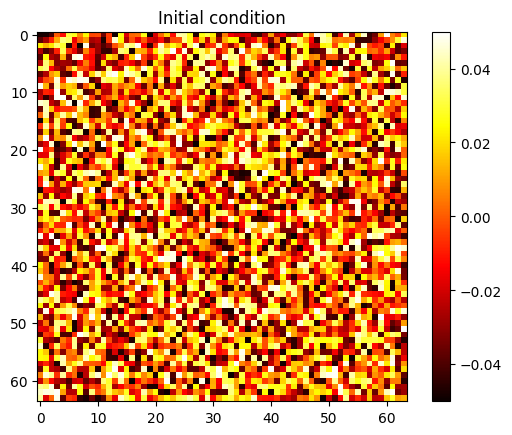

In [5]:
# Parameters
N = 64
b = 350
a = -b
M = 1
kappa = 0.075
t_final = .1
max_niter = 1000
plot = True

# Initial condition
c0 = 0.05 * np.random.uniform(-1,1, size = (N+4, N+4))
chs.boundary_condition(c0)

plt.imshow(c0[2:-2,2:-2], cmap = 'hot')
plt.title("Initial condition")
plt.colorbar()
plt.savefig("initial_condition.png")
plt.show()

# Backward Euler (Implicit Rk1) Scheme

Number of Cells = 64


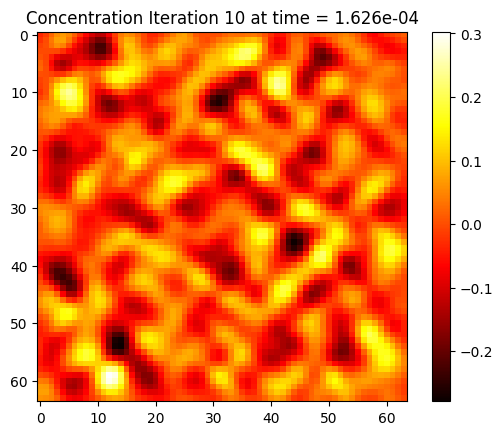

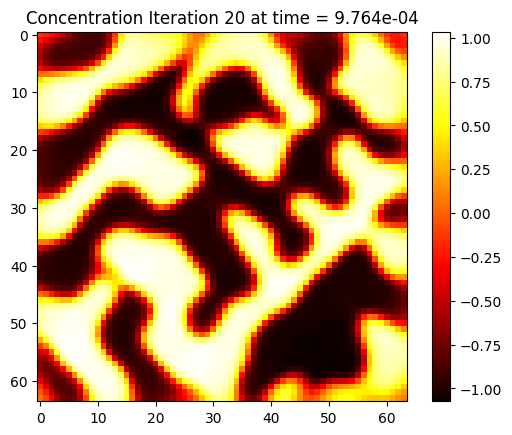

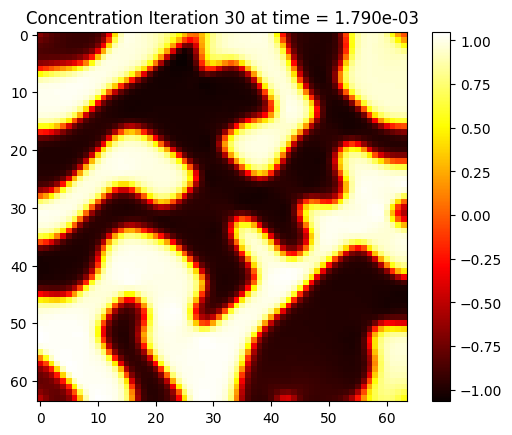

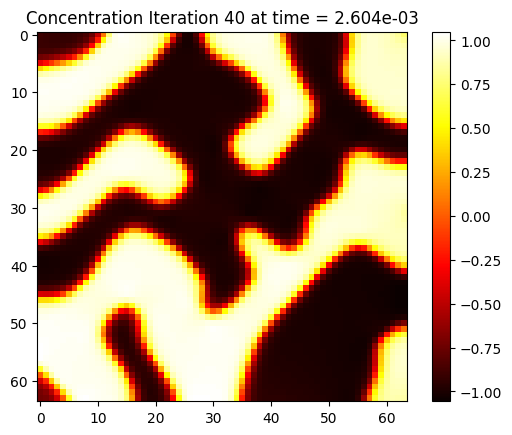

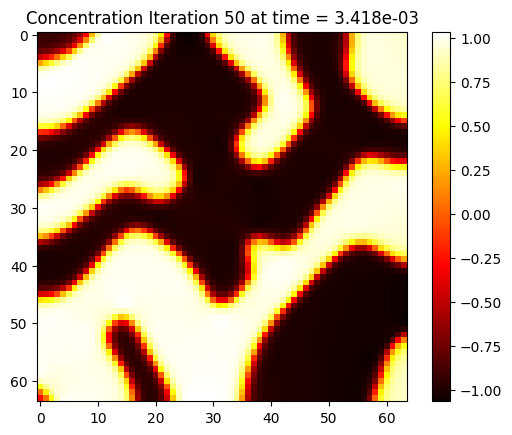

In [ ]:
c_RN, t_RN, E_RN, ctime_RN = chs.raphson_newton(t_final, c0, N, M, a, b, kappa, nitertot = max_niter, plot=plot)

In [ ]:
print('Maximum concentration = ', np.max(c_RN))
print('Minimum concentration = ', np.min(c_RN))
print("Final Energy = ", E_RN[-1])
M = 1
plt.imshow(c_RN[M:-M,M:-M], cmap = 'hot', interpolation = "nearest")
plt.title(f"CH Time = {t_RN[-1]:.2e} with {max_niter} iterations in {ctime_RN:.2e} seconds")
plt.savefig("final_raphson_newton.png")
plt.colorbar()

# RK4 Scheme

In [ ]:
c_RK4, t_RK4, E_RK4, ctime_RK4 = chs.RK4(t_final, c0, N, M, a, b, kappa, plot=plot, nitertot=max_niter)

In [ ]:
print('Maximum concentration = ', np.max(c_RK4))
print('Minimum concentration = ', np.min(c_RK4))
print("Final Energy = ", E_RK4[-1])
M = 1
plt.imshow(c_RK4[M:-M,M:-M], cmap = 'hot', interpolation = "nearest")
plt.title(f"CH Time = {t_RK4[-1]:.2e} in {ctime_RK4:.2e} seconds")
plt.savefig("final_RK4.png")
plt.colorbar()

# Explicit RK1 Scheme - Forward Euler

In [ ]:
c, t, E, ctime = chs.CH_solver_fourth_deriv(t_final, c0, N, M, a, b, kappa, plot=plot, nitertot=max_niter)

In [ ]:
print('Maximum concentration = ', np.max(c))
print('Minimum concentration = ', np.min(c))
print("Final Energy = ", E[-1])

M = 1
plt.imshow(c[M:-M,M:-M], cmap = 'hot', interpolation = "nearest")
plt.title(f"CH Time = {t[-1]:.2e} iterations in {ctime:.2e} seconds")
plt.savefig("final_RK1.png")
plt.colorbar()

# ESDIRK Scheme

In [ ]:
#c_ESDIRK, t_ESDIRK, E_ESDIRK, ctime_ESDIRK = chs.ESDIRK(t_final, c0, N, M, a, b, kappa, nitertot = max_niter, plot=plot)

In [ ]:
#print('Maximum concentration = ', np.max(c))
#print('Minimum concentration = ', np.min(c))
#print("Final Energy = ", E[-1])

M = 1
#plt.imshow(c_ESDIRK[M:-M,M:-M], cmap = 'hot', interpolation = "nearest")
#plt.title(f"CH Time = {t[-1]:.2e} iterations in {ctime_ESDIRK:.2e} seconds")
#plt.savefig("final_ESDIRK.png")
#plt.colorbar()

# Comparison of the schemes

In [ ]:
plt.scatter(t_RN, E_RN, label = "Raphson Newton")
plt.plot(t_RN, E_RN)
plt.scatter(t_RK4, E_RK4, label = "RK4")
plt.plot(t_RK4, E_RK4)
plt.scatter(t, E, label = "RK1")
plt.plot(t, E)
#plt.scatter(t_ESDIRK, E_ESDIRK, label = "ESDIRK")
#plt.plot(t_ESDIRK, E_ESDIRK)
plt.xscale('log')
plt.xlabel("Time (s)")
plt.ylabel("Total Energy")
plt.title("Comparison of Conservation of Energy")
plt.legend()
plt.show()

In [ ]:
# Printing all compute times
print(f"Raphson Newton compute time = {ctime_RN:.2e} seconds")
print(f"RK4 compute time = {ctime_RK4:.2e} seconds")
print(f"RK1 compute time = {ctime:.2e} seconds")
#print(f"ESDIRK compute time = {ctime_ESDIRK:.2e} seconds")
